Should be put where the directory 'output'is , i.e. the directory that contains all output images

In [9]:
from itertools import product
from PIL import Image
import os
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
from IPython.display import display, clear_output
import math

In [2]:
CONTENT = 'tubingen.jpg'
STYLE = 'starry-night.jpg'

CONTENT_LAYERS = ['conv5_2',
                  'conv4_2',
                  'conv3_2',
                  'conv2_2']

STYLE_LAYERS = ['conv1_1,conv2_1,conv3_1,conv4_1,conv5_1', # all style, first
                'conv3_1,conv4_1,conv5_1',                 # high level style
                'conv1_2,conv2_2,conv3_2,conv4_2,conv5_2', # all style, second
                'conv1_2,conv2_2,conv3_4,conv4_4,conv5_4'] # all style, third

INIT = ['random', 
        'image']

STYLE_WEIGHTS = ['5', 
                 '100', 
                 '500', 
                 '2000']

OPTIMIZERS = ['Adam', 
              'L-BFGS']

NUM_ITERATIONS = '1000'

TV_WEIGHTS = ['0.00001', 
              '0.1', 
              '10']

In [3]:
img1 = None
img2 = None

def plot_image(cont, style, init, style_weight, optimizer, tv_weight, n):
    global img1, img2
    folder_name = os.path.join('output', cont, style, str(style_weight), optimizer, init, str(tv_weight))
    filename = os.path.basename(CONTENT)[:-4] + '_' + os.path.basename(STYLE)[:-4] + '.jpg'
    if n == 1:
        img1 = Image.open(os.path.join(folder_name, filename))
        plt.imshow(img1)
    else:
        img2 = Image.open(os.path.join(folder_name, filename))
        plt.imshow(img2)

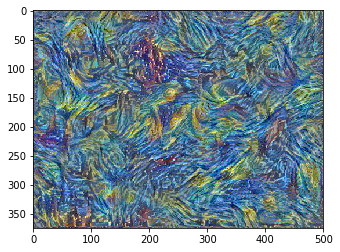

In [4]:
# Plot an image...
plot_image(CONTENT_LAYERS[0], STYLE_LAYERS[0], INIT[0], STYLE_WEIGHTS[0], OPTIMIZERS[0], TV_WEIGHTS[0], 1)

In [12]:
def interpolate_images(alpha, interp):
    pixels1 = list(img1.getdata())
    pixels2 = list(img2.getdata())
    interpolate_channels_quadratic = lambda c1,c2,a: int(math.sqrt((c1**2)*(1-a) + (c2**2)*a))
    interpolate_channels_linear = lambda c1,c2,a: int(c1*(1-a) + c2*a)
    if interp == "linear":
        interpolate_channels = interpolate_channels_linear
    else:
        interpolate_channels = interpolate_channels_quadratic
    new_pixels = [(interpolate_channels(p1[0],p2[0],alpha),
                   interpolate_channels(p1[1],p2[1],alpha),
                   interpolate_channels(p1[2],p2[2],alpha)) for p1,p2 in zip(pixels1, pixels2)]
    new_img = img1.copy()
    new_img.putdata(new_pixels)
    plt.imshow(new_img)

In [13]:
interact(
    plot_image,
    cont=CONTENT_LAYERS,
    style=STYLE_LAYERS,
    init=INIT,
    style_weight=STYLE_WEIGHTS,
    optimizer=OPTIMIZERS,
    tv_weight=TV_WEIGHTS,
    n=1
)
interact(
    plot_image,
    cont=CONTENT_LAYERS,
    style=STYLE_LAYERS,
    init=INIT,
    style_weight=STYLE_WEIGHTS,
    optimizer=OPTIMIZERS,
    tv_weight=TV_WEIGHTS,
    n=2
)
interact(interpolate_images,
         alpha=(0.,1.,0.05),
         interp=["linear","quadratic"])

interactive(children=(Dropdown(description='cont', options=('conv5_2', 'conv4_2', 'conv3_2', 'conv2_2'), value…

interactive(children=(Dropdown(description='cont', options=('conv5_2', 'conv4_2', 'conv3_2', 'conv2_2'), value…

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, step=0.05), Dropdown(description='i…

<function __main__.interpolate_images(alpha, interp)>

In [ ]:
"""
# Animation
for alpha in np.arange(0.,1.,0.05):
    img = interpolate_images(alpha)
    clear_output(wait=True)
    display(img)
    
plt.show()
"""